# EDA

In [1]:
import numpy as np
import pandas as pd
import spacy
from pathlib import Path
import random
import matplotlib.pyplot as plt
import seaborn as sns

print(spacy.__version__)

2.1.3


First we would like to run spacy NLP on each of the documents
that we have randomly sampled from the larger dataset. Because they
have been sampled at random, we expect that they will be representative
of the entire dataset.

In [2]:
from spacyOps import createInferencePipe
nlp = createInferencePipe()
'''
nlp = spacy.load('en')

# Add sentancizer and custom labeler
sentencizer = nlp.create_pipe('sentencizer')
nlp.add_pipe(sentencizer, first=True)
nlp.add_pipe(edaLabeler)
'''
wikiDataPath = Path('./data/wiki-sample')
wikiFiles = [x for x in wikiDataPath.glob('**/*.txt') if x.is_file()]

In [3]:
print('There are {} files in the wiki-sample directory'.format(len(wikiFiles)))
print('Running SpaCy NLP on the files (this can take up to 5 minutes)')
wikiDocs = [nlp(fo.read_text(encoding='utf-8')) for fo in wikiFiles]

There are 1000 files in the wiki-sample directory
Running SpaCy NLP on the files (this can take up to 5 minutes)


In [4]:
podcastDataPath = Path('./data/podcasts')
podcastFiles = [x for x in podcastDataPath.glob('**/*.txt') if x.is_file()]

print('There are {} files in the podcast directory'.format(len(podcastFiles)))
print('Running SpaCy NLP on the files (this will take a few minutes)')

podcastDocs = [nlp(fo.read_text(encoding='utf-8')) for fo in podcastFiles]


There are 47 files in the podcast directory
Running SpaCy NLP on the files (this will take a few minutes)


First let's provide some stucture by organizing our documents into a
pandas dataframe

In [5]:
wiki_df = pd.DataFrame()
wiki_df['doc_name'] = [str(x.stem) for x in wikiFiles]
print(wiki_df.head())

pod_df = pd.DataFrame()
pod_df['doc_name'] = [str(x.stem) for x in podcastFiles]
print(pod_df.head())


  doc_name
0  2061318
1  6416879
2  2838306
3   574933
4   118427
  doc_name
0   katy94
1   tim362
2   katy92
3  katy115
4   katy81


Next let's compare some key characteristics about the 2 datasets

Number of words - Right away, we can see that the podcasts are much longer
on average than the wiki articles.

In [6]:
wiki_num_words = [len(x) for x in wikiDocs]
wiki_df['num_words'] = wiki_num_words

pod_num_words = [len(x) for x in podcastDocs]
pod_df['num_words'] = pod_num_words

In [7]:
# Let's add our spacy tokenized sentences and corresponding labels to the dataframe
# number of sentences
label_arr = []
sent_arr = []
for doc in wikiDocs:
    labels = np.array(doc.user_data['labels'])
    sents = np.array(doc.user_data['sents'], dtype=object)
    label_arr.append(labels)
    sent_arr.append(sents)

wiki_df['sents'] = sent_arr
wiki_df['labels'] = label_arr

label_arr = []
sent_arr = []
for doc in podcastDocs:
    labels = np.array(doc.user_data['labels'])
    sents = np.array(doc.user_data['sents'], dtype=object)
    label_arr.append(labels)
    sent_arr.append(sents)

pod_df['sents'] = sent_arr
pod_df['labels'] = label_arr

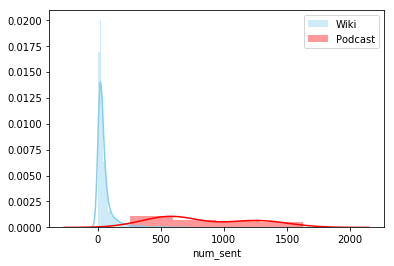

In [8]:
wiki_df['num_sent'] = wiki_df.apply(lambda row: len(row.sents), axis=1)
pod_df['num_sent'] = pod_df.apply(lambda row: len(row.sents), axis=1)

sns.distplot( wiki_df['num_sent'] , color="skyblue", label='Wiki')
sns.distplot( pod_df['num_sent'] , color="red", label='Podcast')
plt.legend()
plt.show()


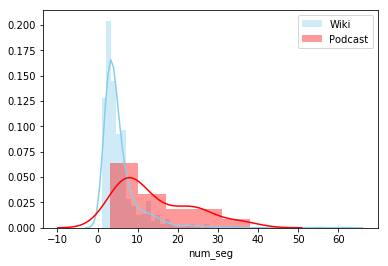

In [9]:
# number of segments
wiki_df['num_seg'] = wiki_df.apply(lambda row: sum(row.labels), axis=1)
pod_df['num_seg'] = pod_df.apply(lambda row: sum(row.labels), axis=1)

sns.distplot( wiki_df['num_seg'] , color="skyblue", label='Wiki')
sns.distplot( pod_df['num_seg'] , color="red", label='Podcast')
plt.legend()
plt.show()

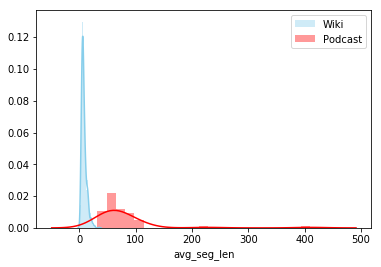

The average segment length for wiki is 7.000
The average segment length for podcasts is 61.154


In [10]:
# average segment length
wiki_df['avg_seg_len'] = wiki_df.apply(lambda row: row.num_sent/row.num_seg, axis=1)
pod_df['avg_seg_len'] = pod_df.apply(lambda row: row.num_sent/row.num_seg, axis=1)

sns.distplot( wiki_df['avg_seg_len'] , color="skyblue", label='Wiki')
sns.distplot( pod_df['avg_seg_len'] , color="red", label='Podcast')
plt.legend()
plt.show()

avg_seg_wiki = wiki_df['avg_seg_len'].median()
avg_seg_pod = pod_df['avg_seg_len'].median()
print('The average segment length for wiki is {:0.3f}'.format(avg_seg_wiki))
print('The average segment length for podcasts is {:0.3f}'.format(avg_seg_pod))

In [11]:
# parts of speech

In [12]:
# poloarity

In [13]:
"""One of the major challenges we would like to address is whether our neural network
can be trained on the Wiki dataset, but also generalize to the podcast data. Central
to this question is how similar the datasets are. Wikipedia articles are typically
dispassionate, informative, and well structured. Conversely, podcasts are conversational
in nature. They assume all of the nuances of human speech such as studders, runaway thoughts,
interruptions, etc."""

# Actionable insights - From this exploratory data analysis, we can use some of the
# insights gained to inform the construction of our network and preprocessing decisions.
# Specifically, we note the large discrepency in average segment length between the podcasts
# and wiki datasets. To combat this effect, we decided to eliminate segments shorter than 5
# sentences in the wiki dataset during preprocessing. Additionally, we eliminated all Wiki 
# articles with fewer than 3 segments. Our goal is to extract from the wiki dataset articles
# that will be more structurally similar to the podcasts. 

'One of the major challenges we would like to address is whether our neural network\ncan be trained on the Wiki dataset, but also generalize to the podcast data. Central\nto this question is how similar the datasets are. Wikipedia articles are typically\ndispassionate, informative, and well structured. Conversely, podcasts are conversational\nin nature. They assume all of the nuances of human speech such as studders, runaway thoughts,\ninterruptions, etc.'